# Probability calculus
If P(x) is the probability at x then $$ \int_{\infty}^{\infty} P(x)\ dx\ =\ 1$$ and the units of P(x) are x$^{-1}$.


If x$_{1}$, x$_{2}$ two variables then in a Gaussian distribution: P(x$_{1}$,x$_{2}$)=N($\mu,\sigma$).


Factoring is a very important property in probabilities:
$$ P(x,y) = P(x|y)\ P(y) $$
or if we have more variables: 
$$ P(x_1, x_2, x_3, x_4) = P(x_1|x_2, x_3, x_4)\ P(x_2, x_3, x_4) $$ or even more...
$$ P(x_1, x_2, x_3, x_4) = P(x_1|x_2, x_3, x_4)\ P(x_2| x_3, x_4)\ P(x_3 | x_4)\ P(x_4) $$

Also $$ P(x,y) = P(x)\ P(y) $$ only if the covariance matrix is cov(x,y)=0.

## Bayesian probability
If we assume we draw random values D={x$_{i}$} from a Gaussian distribution N($\mu,\sigma$), but we do not know the $\mu$ and $\sigma$ values, but only that it is a Gaussian model M (prior).  Then using the factoring we can estimate the P(M|D) as:

$$ P(M,D) = P(D|M) P(M) $$
$$ P(D,M) = P(M|D) P(D) $$

these two math statements are equivalent and can be set equal to each other:

$$ P(M|D) P(D) = P(D|M) P(M) $$

We can now solve:

$$ P(M|D) = \frac{P(D|M) P(M)}{P(D)}~~~~Bayes~Theorem$$

where: 
* P(M|D): the PDF of M given the data 
* P(D|M): the likelihood, P(D|M) = P({x$_{i}$}|$\mu,\sigma$) = $\prod_i P( x_i\ |\ \mu, \sigma)$
* P(M): the prior probability (since we assumed that it is a Gaussian)


In [6]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats
from scipy.optimize import minimize, brent
from decimal import Decimal
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1) Example of data w/o covariance
Let's go through a few examples, using two variables, $a$ and $b$, in abstract, mathematical senses. We will start off with a multivariate normal distribution which can be written in the following way: 

$$ P(a,b) = \mathcal{N} (\mathbf{\mu}, \mathbf{\Sigma})$$
where:
$$ \mathbf{\mu} = \left[ \begin{array}{c} 0 \\ 0 \end{array} \right]\ {\rm and }\ \mathbf{\Sigma} = \left[ \begin{array}{cc} 0.7 & 0.0 \\ 0.0 & 0.2 \end{array} \right]$$
The non-zero cross terms in $\mathbf{\Sigma}$ indicate there is no covariance between $x$ and $y$. 

We will also look at a version with covariance:
$$\mathbf{\Sigma} = \left[ \begin{array}{cc} 0.7 & 0.3 \\ 0.3 & 0.2 \end{array} \right]$$

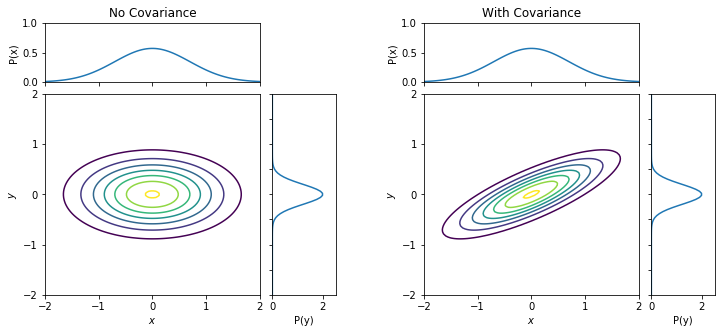

In [2]:
fig = plt.figure(figsize=(12,5))

### Without Covariance ###

mean = np.array([0.0, 0.0])
cov = np.array([[0.7, 0.0],
                [0.0, 0.2]])

xmin, xmax = -2, 2
ymin, ymax = -2, 2

tmp_x = np.linspace(xmin, xmax, 100)
tmp_y = np.linspace(ymin, ymax, 100)

XX, YY = np.meshgrid(tmp_x, tmp_y) # Return coordinate matrices from coordinate vectors

ZZ = stats.multivariate_normal.pdf(np.array([YY,XX]).T, mean=mean, cov=cov)

ax0 = plt.subplot2grid((4, 9), (1, 0), colspan=3, rowspan=3)
ax0.contour(XX, YY, ZZ, color='k')
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.set_xticks(np.linspace(-2,2,5))
ax0.set_yticks(np.linspace(-2,2,5))
ax0.set_xlabel(r"$x$")
ax0.set_ylabel(r"$y$")

ax1 = plt.subplot2grid((4, 9), (0, 0), colspan=3)
ax1.plot(tmp_x, stats.norm.pdf(tmp_x, loc=mean[0], scale=cov[0,0]))
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(0, 1)
ax1.set_xticklabels([])
ax1.set_ylabel(r"P(x)")
ax1.set_title("No Covariance")

ax2 = plt.subplot2grid((4, 9), (1, 3), rowspan=3)
ax2.plot(stats.norm.pdf(tmp_y, loc=mean[1], scale=cov[1,1]), tmp_y)
ax2.set_xlim(0, 2.5)
ax2.set_ylim(-2, 2)
ax2.set_yticklabels([])
ax2.set_xlabel(r"P(y)")

#### With Covariance ####

mean = np.array([0.0, 0.0])
cov = np.array([[0.7, 0.3],
                [0.3, 0.2]])

xmin, xmax = -2, 2
ymin, ymax = -2, 2

tmp_x = np.linspace(xmin, xmax, 100)
tmp_y = np.linspace(ymin, ymax, 100)

XX, YY = np.meshgrid(tmp_x, tmp_y)

ZZ = stats.multivariate_normal.pdf(np.array([YY,XX]).T, mean=mean, cov=cov)

ax0 = plt.subplot2grid((4, 9), (1, 5), colspan=3, rowspan=3)
ax0.contour(XX, YY, ZZ, color='k')
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.set_xticks(np.linspace(-2,2,5))
ax0.set_yticks(np.linspace(-2,2,5))
ax0.set_xlabel(r"$x$")
ax0.set_ylabel(r"$y$")


ax1 = plt.subplot2grid((4, 9), (0, 5), colspan=3)
ax1.plot(tmp_x, stats.norm.pdf(tmp_x, loc=mean[0], scale=cov[0,0]))
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(0, 1)
ax1.set_xticklabels([])
ax1.set_ylabel(r"P(x)")
ax1.set_title("With Covariance")


ax2 = plt.subplot2grid((4, 9), (1, 8), rowspan=3)
ax2.plot(stats.norm.pdf(tmp_y, loc=mean[1], scale=cov[1,1]), tmp_y)
ax2.set_xlim(0, 2.5)
ax2.set_ylim(-2, 2)
ax2.set_yticklabels([])
ax2.set_xlabel(r"P(y)")



# plt.tight_layout()
plt.show()

Let's imagine that we observe $x=0.5$ and we want to know the probability of $y$ *given* our observed value of $x$. That is, what is $P(y\ |\ x=0.5)$. Let's plot the two different versions below (with and without covariance)

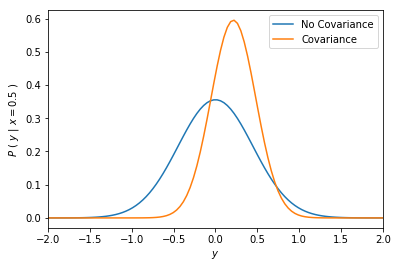

In [3]:
# Create an array of length 100 of value 0.5 for x
tmp_x = 0.5 * np.ones(100)
tmp_y = np.linspace(xmin, xmax, 100)

# Evaluate the multivariate normal distribution
mean = np.array([0.0, 0.0])
cov = np.array([[0.7, 0.0],
                [0.0, 0.2]])

P_y = stats.multivariate_normal.pdf(np.array([tmp_x,tmp_y]).T, mean=mean, cov=cov)
plt.plot(tmp_y, P_y, label="No Covariance")

mean = np.array([0.0, 0.0])
cov = np.array([[0.7, 0.3],
                [0.3, 0.2]])

P_y = stats.multivariate_normal.pdf(np.array([tmp_x,tmp_y]).T, mean=mean, cov=cov)
plt.plot(tmp_y, P_y, label="Covariance")


plt.xlim(xmin, xmax)

plt.legend(loc=1)

plt.xlabel(r"$y$")
plt.ylabel(r"$P\ (\ y\ |\ x=0.5\ )$")

plt.show()

Now we are going to see how to calculate the P({x$_{i}$}|$\mu,\sigma$) with the following example: we have a Gaussian with $\mu, \sigma$=2.5, 0.5 and we randomly draw 10 values. 

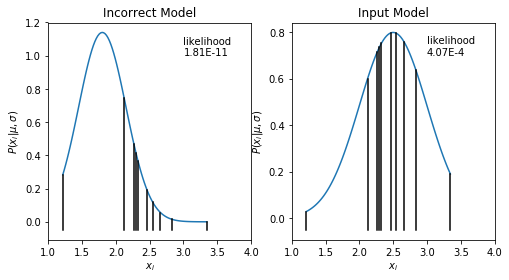

In [4]:
N_samples = 10

fig, ax = plt.subplots(1, 2, figsize=(8,4))

# The values of the Gaussian
mean, std_dev = 2.5, 0.5

# Randomly draw 10 values from a normal distr.
x_i = stats.norm.rvs(loc=mean, scale=std_dev, size=N_samples)


##### Wrong values #####
# Let's calculate the likelihood of these data using the wrong model:
mean_test = 1.8
std_dev_test = 0.35
tmp_x = np.linspace(min(x_i),max(x_i), 100)

ax[0].plot(tmp_x, stats.norm.pdf(tmp_x, loc=mean_test, scale=std_dev_test)) # plot it
# Plot the data points as vertical lines
for i in range(len(x_i)):
    ax[0].plot([x_i[i],x_i[i]], [-0.05,stats.norm.pdf(x_i[i], 
                                loc=mean_test, scale=std_dev_test)], color='k')

likelihood = np.product(stats.norm.pdf(x_i, loc=mean_test, scale=std_dev_test))
likelihood = "likelihood \n{:.2E}".format(Decimal(likelihood))
ax[0].text(3.0, 1.0, str(likelihood))
ax[0].set_title("Incorrect Model")

##### Correct values #####
# Let's calculate the likelihood of these data using the wrong model:
mean_test = 2.5
std_dev_test = 0.5
tmp_x = np.linspace(min(x_i),max(x_i), 100)

ax[1].plot(tmp_x, stats.norm.pdf(tmp_x, loc=mean_test, scale=std_dev_test))
# Plot the data points as vertical lines
for i in range(len(x_i)):
    ax[1].plot([x_i[i],x_i[i]], [-0.05,stats.norm.pdf(x_i[i], 
                                loc=mean_test, scale=std_dev_test)], color='k')

likelihood = np.product(stats.norm.pdf(x_i, loc=mean_test, scale=std_dev_test))
likelihood = "likelihood \n{:.2E}".format(Decimal(likelihood))
ax[1].text(3.0, 0.7, str(likelihood))
ax[1].set_title("Input Model")
    
    
    
for i in range(2):    
    ax[i].set_xlim(1.0,4.0)
    ax[i].set_xlabel(r"$x_i$")
    ax[i].set_ylabel(r"$P(x_i | \mu, \sigma)$")

    
plt.show()

Obviously, by eye the incorrect model is not as good as the input model, but the likelihood gives us a quantitative function by which we can measure how good of a model it is. 

Below, we make a 2D map in $(\mu, \sigma)$ space of the likelihood function. 

(The neg likelihood is basically to avoid very large numbers, we instead minimize the  -L = maximaze the L)

Maximum likelihood could not be found


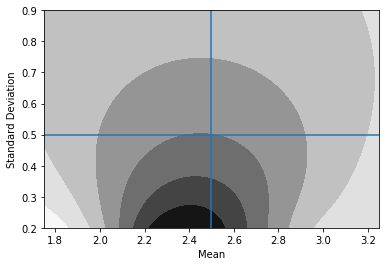

In [5]:
def calc_likelihood(x_i, mean, std_dev):
    return np.sum(stats.norm.pdf(x_i, loc=mean, scale=std_dev))
#     return np.sum(np.log(stats.norm.pdf(x_i, loc=mean, scale=std_dev)))

# Maximum likelihood value
def neg_likelihood(M, x_i):
    mean, std_dev = M    
    return -1.0 * calc_likelihood(x_i, mean, std_dev)


xmin, xmax = 1.75, 3.25
ymin, ymax = 0.2, 0.9

tmp_x = np.linspace(xmin, xmax, 100)
tmp_y = np.linspace(ymin, ymax, 100)

XX, YY = np.meshgrid(tmp_x, tmp_y)
ZZ = np.zeros(shape=XX.shape)

for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        ZZ[i,j] = calc_likelihood(x_i, XX[i,j], YY[i,j])
        
# Plot contours
plt.contourf(XX, YY, ZZ, cmap='Greys')

# Plot input value
plt.axhline(std_dev)
plt.axvline(mean)

x0 = np.array([2.4, 0.4])
res = minimize(neg_likelihood, x0, args=(x_i,))
if res.success == True:
    plt.scatter(res.x[0], res.x[1], color='r', label='Maximum likelihood')
else:
    print("Maximum likelihood could not be found")
    
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")

plt.legend()
plt.show()